# Frequentist vs Bayesian Linear Regression

## Introduction

In [1]:
import numpy as np
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

To demonstrate the difference between frequentist and bayesian perspectives we will use a simple regression problem.

We will create $N$ points uniformly from $[0,1]$ and use them as input to $\sin(2\pi \mathbf{x})$. We add noise to each observation by adding a sample from a Gaussian, $\epsilon \sim \mathcal{N}(0,0.3)$. This creates our dependent random variable $t$. 

$$\mathbf{t} = \sin(2 \pi \mathbf{x}) + \boldsymbol{\epsilon}$$

Notice that $\mathbf{t}$ is stochastic even though $\mathbf{x}$ is not. This is because $\mathbf{t}$ depends on the random variable $\boldsymbol{\epsilon}$. This is also called a stochastic process. In these circumstances, we can calculate the analytic derivative $\frac{d\mathbf{t}}{d\mathbf{x}}$.

In [2]:
def gen_data(size=10):
    x = np.linspace(0,1,size)
    eps = 0.3*np.random.randn(size)
    t = np.sin(2*np.pi*x)+eps
    return (x,t)
x, t = gen_data()

<IPython.core.display.Javascript object>


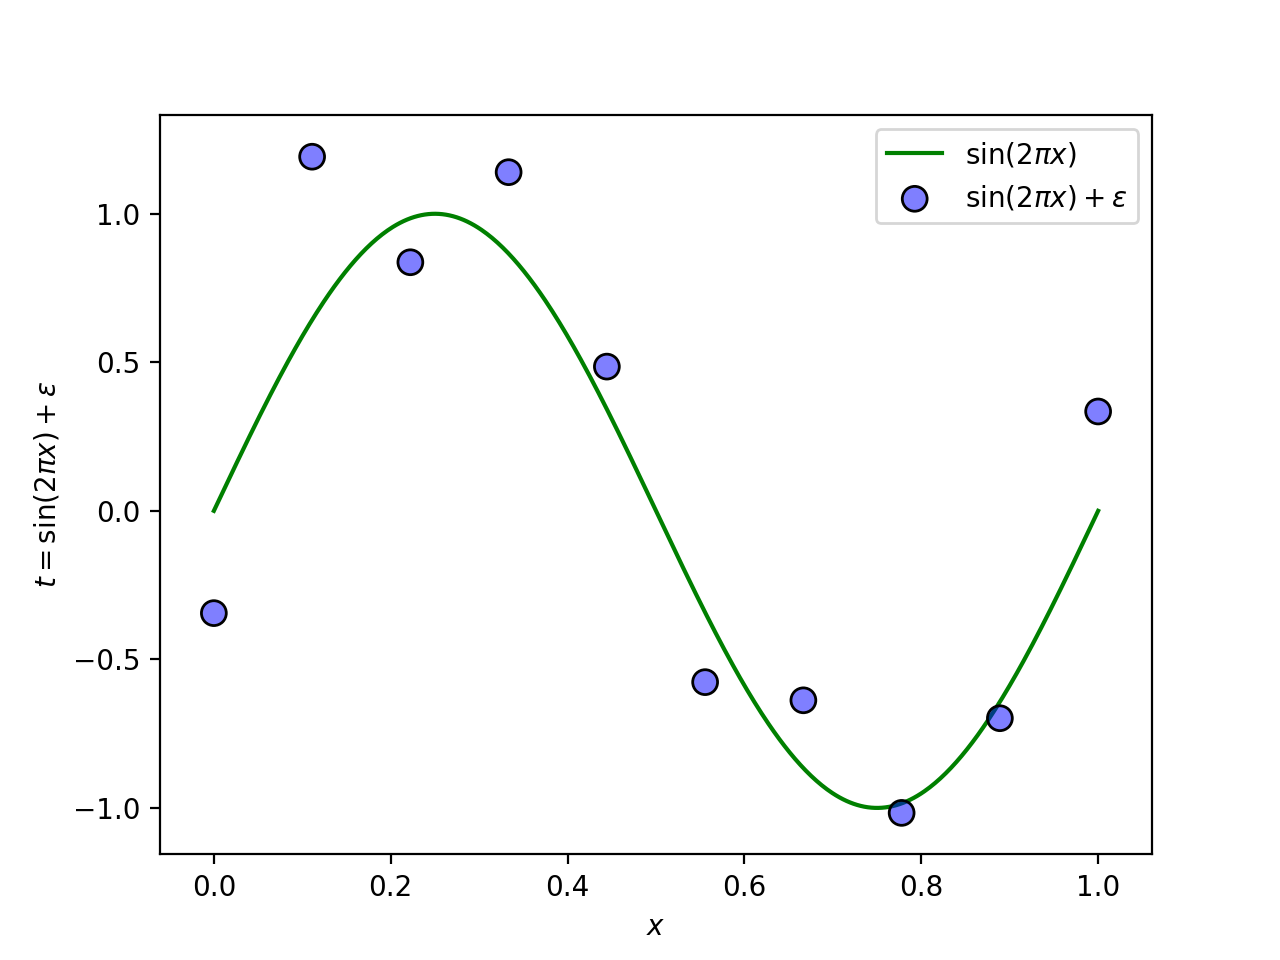

In [3]:
def plot_dataset(axis,x,t):
    axis.plot(np.linspace(0,1,500), np.sin(2*np.pi*np.linspace(0,1,500)), c='g', zorder=1, label='$\sin(2\pi x)$')
    axis.scatter(x,t,edgecolor='k',c=[(0,0,1,0.5)]*len(x), s=80, zorder=2, label='$\sin(2\pi x)+\epsilon$')
    axis.set_xlabel('$x$'); axis.set_ylabel('$t = \sin(2 \pi x)+\epsilon$')
plot_dataset(ax,x,t)
ax.legend()
plt.show()

Given only the $N$ observations $\mathcal{D} = \lbrace \bf{x}, \bf{t} \rbrace$ our goal is to learn $\sin(2 \pi \mathbf{x})$. In other words we'd like to learn the true underlying data generating process, or find the signal through the noise. We should appreciate for a moment how strictly difficult this problem is. Given a discrete, finite, number of observations we wish to generalize to an infinite number of values. In general this is impossible to do exactly. As we shall soon see, the capacity of the model we choose $C$, the number of observations we have $N$, and the inference techniques we employ will all influence the accuracy of our approximation.

---

Let us begin with one of the simplest models, an $M^{\text{th}}$ order polynomial.

$$y(x,\mathbf{w}) = \sum_{i=0}^M w_i x^i$$

In [10]:
def model(x,w,order):
    X = np.vander(x,order,True)
    y = np.dot(X,w)
    return y

where the vector $\mathbf{w}$ contains the coefficients, or parameters of the model. Choosing a simple polynomial may at first seem naive, but remember that within some domain of convergence, a power series can approximate any function exactly. Though as we will see, using polynomials of higher and higer order does not immediately yeild better results as we might expect. 

We have data and a model, how do we measure how accurately our model fits the data? There are many things we will need to consider when designing our cost function, or performance measure. For now however we use a very common technique which is to examine how far each predicted value $y(x,\mathbf{w})$ deviates from its observed value $t$.

<IPython.core.display.Javascript object>


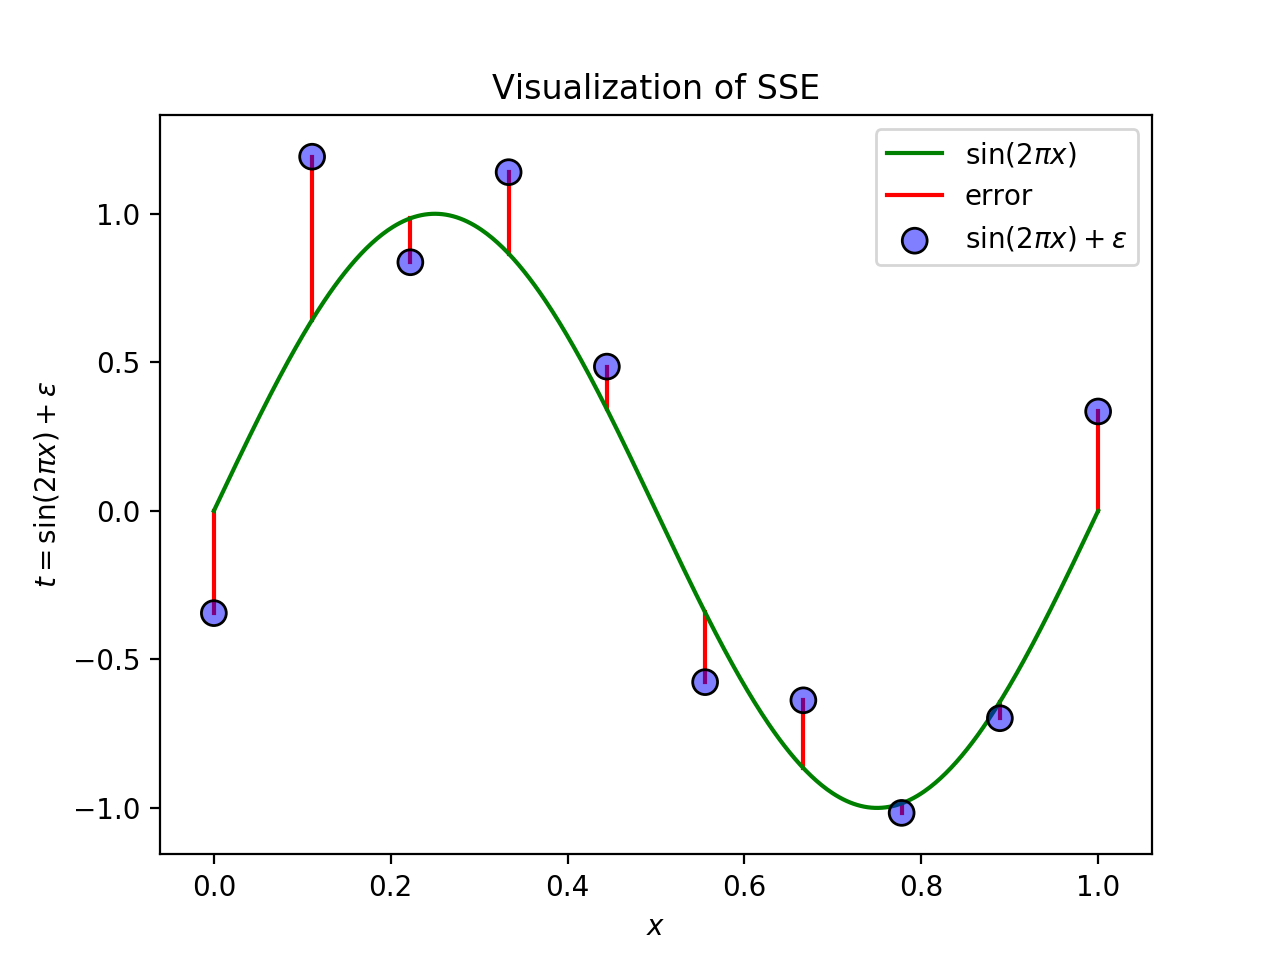

In [4]:
fig, ax = plt.subplots()
plot_dataset(ax,x,t)
for i,(xi,ti) in enumerate(zip(x,t)):
    if i == 0:
        ax.plot([xi,xi],[ti,np.sin(2*np.pi*xi)],c='r',label='error',zorder=0)
    else:
        ax.plot([xi,xi],[ti,np.sin(2*np.pi*xi)],c='r',zorder=0)

ax.legend(); ax.set(title='Visualization of SSE')
plt.show()

Taking each deviation, squaring and summing the result gives us the aptly named, sum of squared errors cost function (SSE)

$$ J(\mathbf{w}) = \frac{1}{2N}\sum_{j=0}^N (t_j-y(x_j,\mathbf{w}))^2$$

where normalizing over the $N$ observations allows us to compare results for different sized datasets.

In [11]:
def J(w,x,t,order):
    c = 1./(2*x.size)
    diff = t-model(x,w,order)
    cost = c*(diff**2).sum()
    return cost

We now have all the peices of a typical machine learning problem, the experience, the task, and the performance measure. Our **experience**, **E**, is the data set $\mathcal{D} = \lbrace (x_i,t_i)\rbrace$. Our **task**, **T**, is to fit our model $y(x,\mathbf{w})$ to the dataset $\mathcal{D}$. Our **performance**, **P**, is the SSE given by $J(\mathbf{w})$. Now we need an algorithm, and according to Mitchell's definition, our algorithm will be a machine learning algorithm if its **performance** on the **task** improves with **experience**, or if our model's fit to the data, as measured by the SSE, improves with more observations $(x_i,t_i)$.

For this problem, the cost function is quadratic in $\mathbf{w}$ and therefore has a unique minimum. This can be found analytically, using statistics, calculus, and linear aglebra. All such derivations produce what is called the Normal Equation

$$\mathbf{w}^* = (X^TX)^{-1}X^T\mathbf{t}$$

where $X$ is the Vandermonde matrix for the $N$ points between $[0,1]$. Numerically this is a nightmare to solve, due to the inverse of the Vandermonde matrix, and is not used in practice. In practice we solve the linear system with factorization methods or iterative schemes.

---

## Capacity and Overfitting
First let us examine the accuracy of our results as a function of the order of the polynomial.

/Users/nathancrock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


<IPython.core.display.Javascript object>


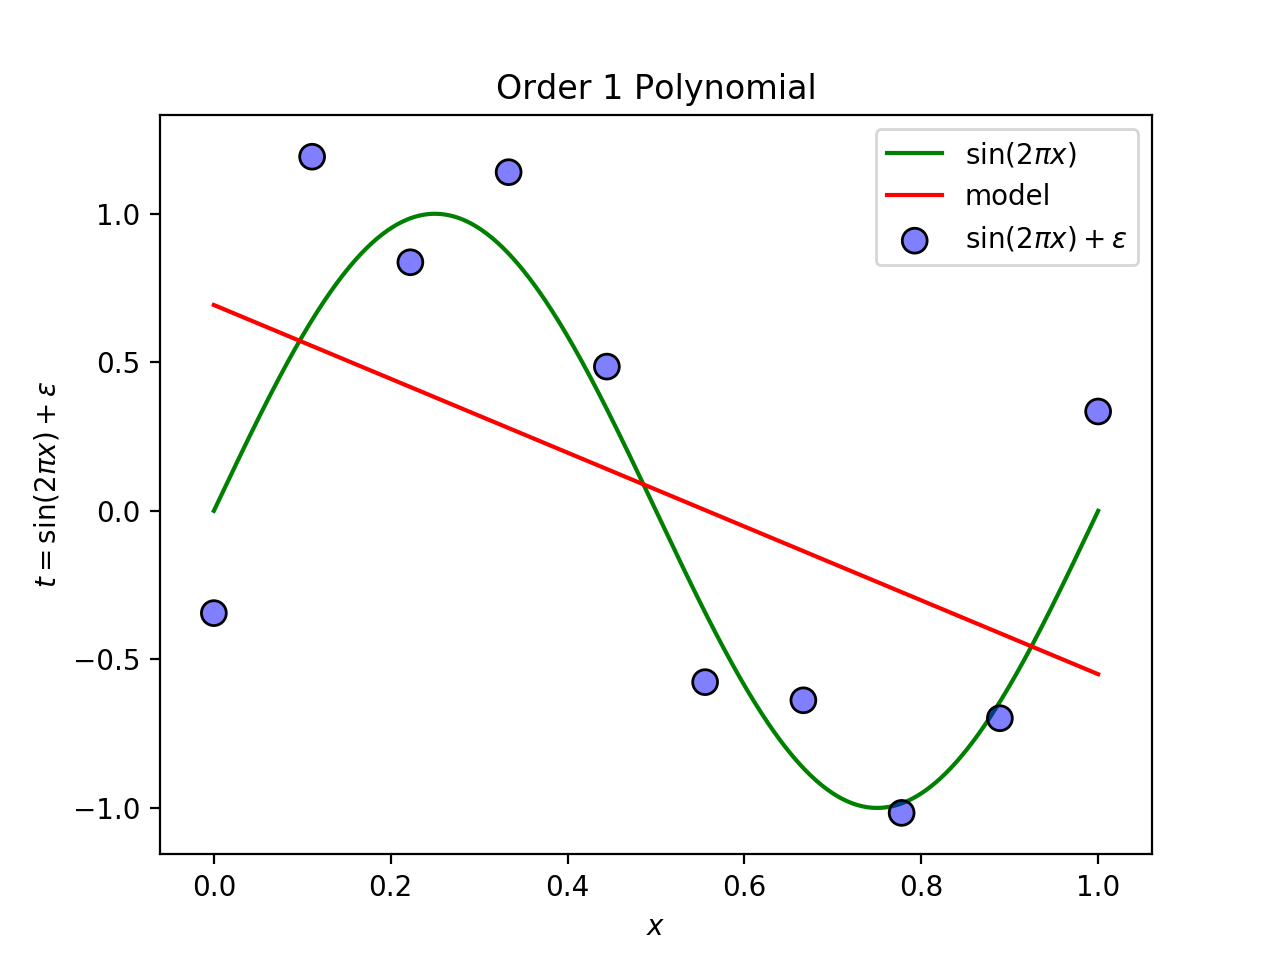

<IPython.core.display.Javascript object>


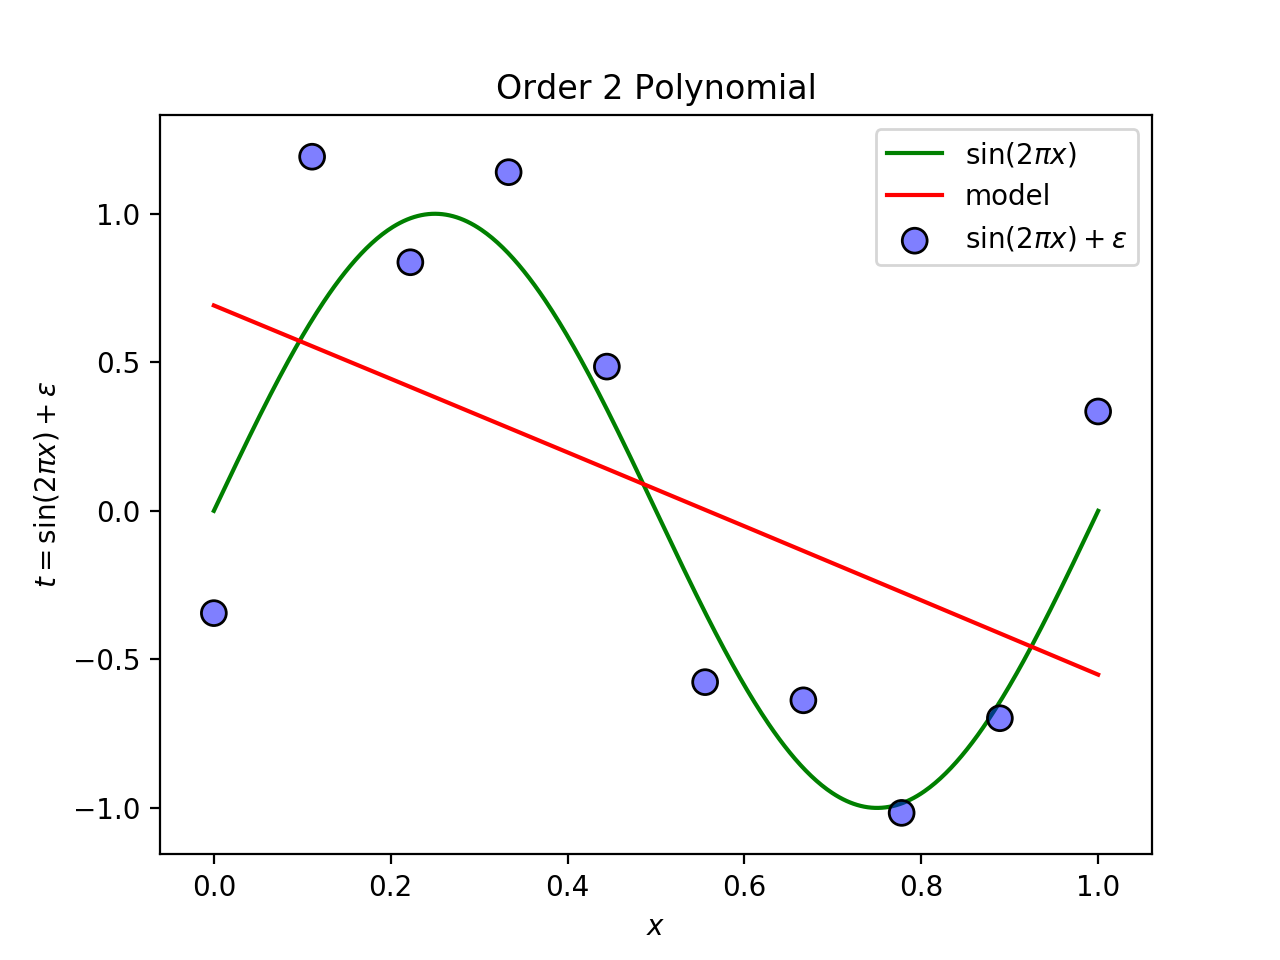

<IPython.core.display.Javascript object>


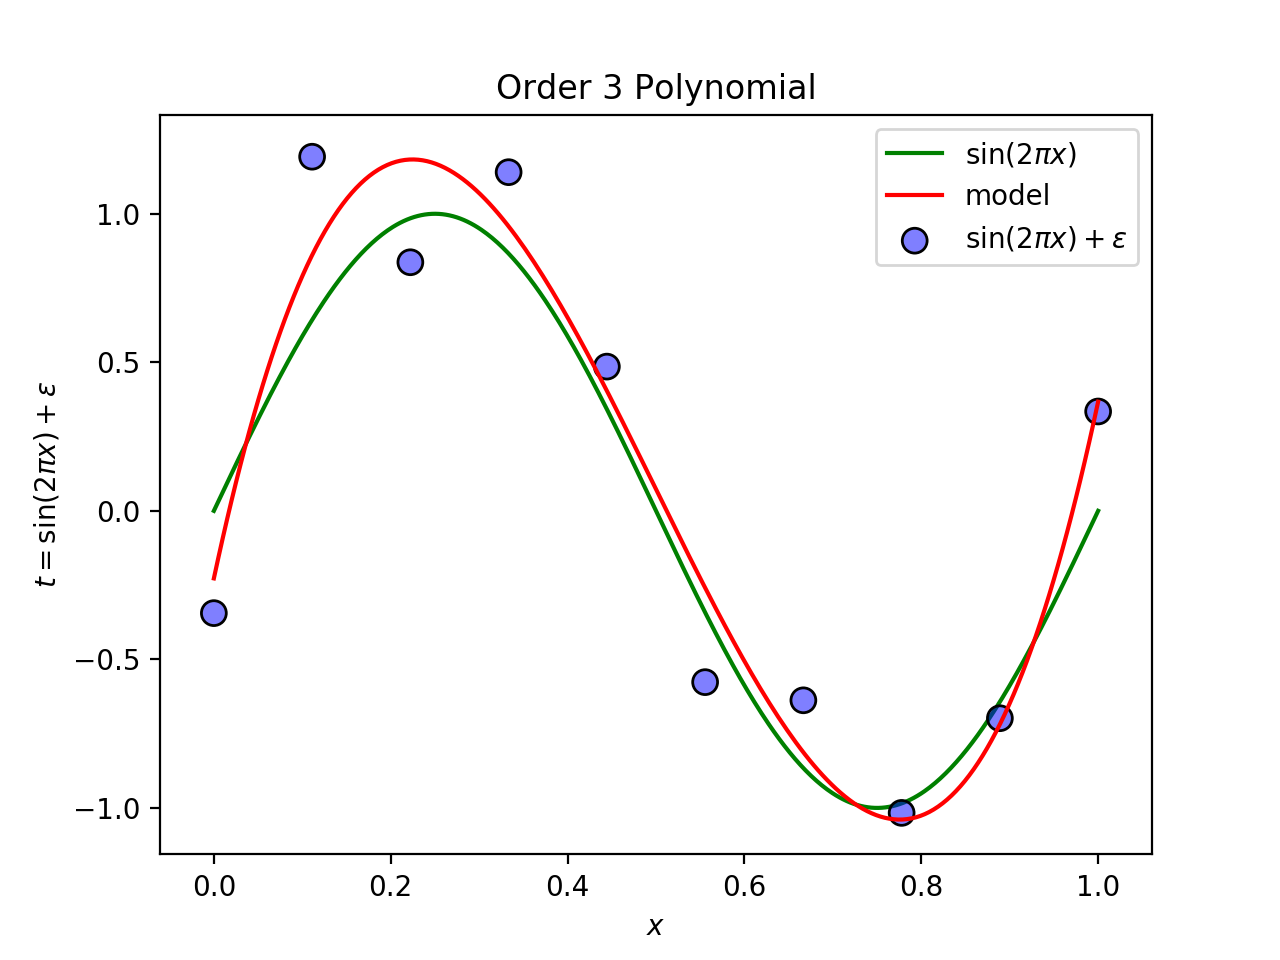

<IPython.core.display.Javascript object>


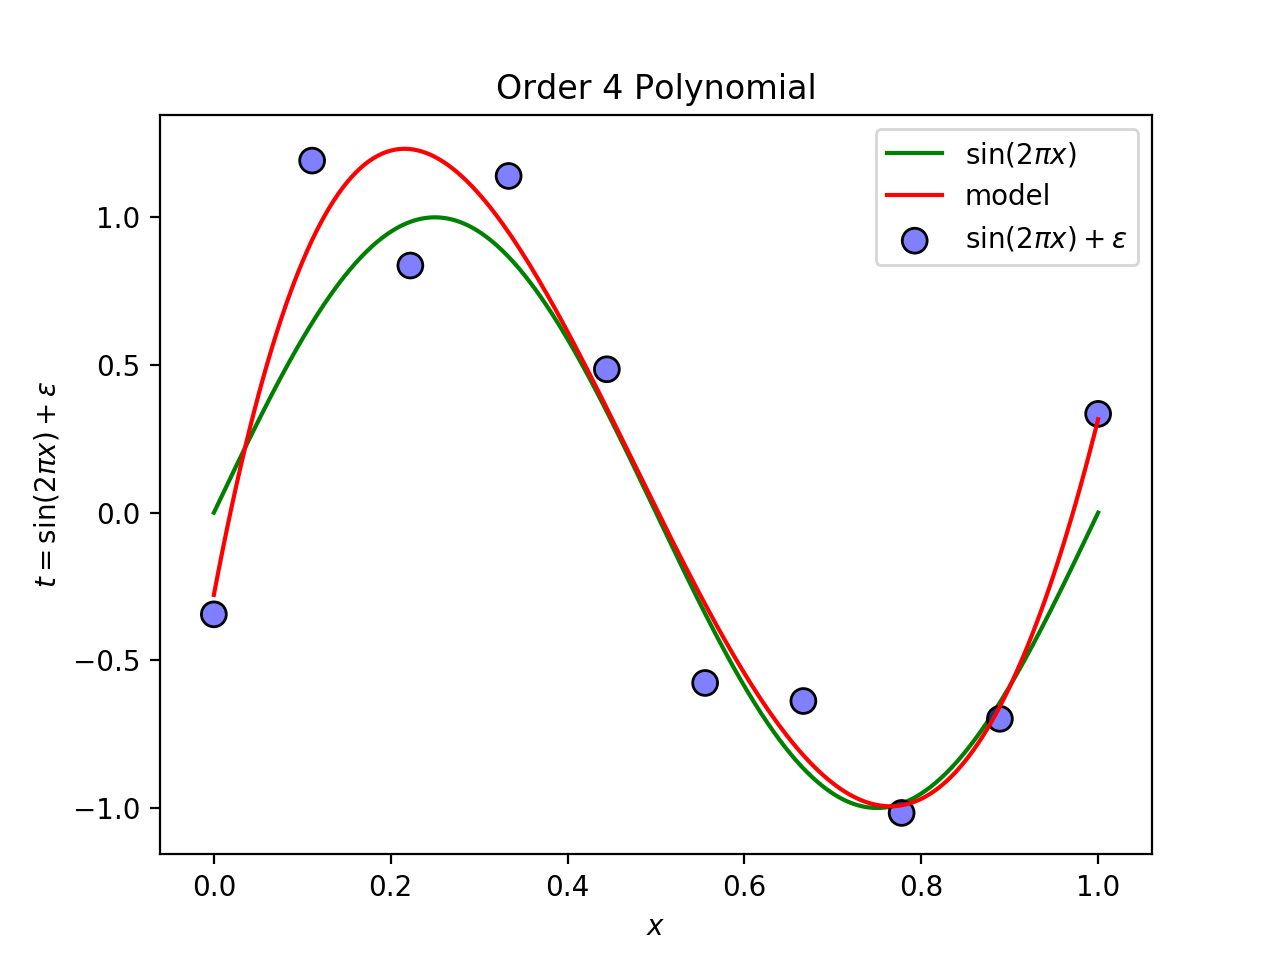

<IPython.core.display.Javascript object>


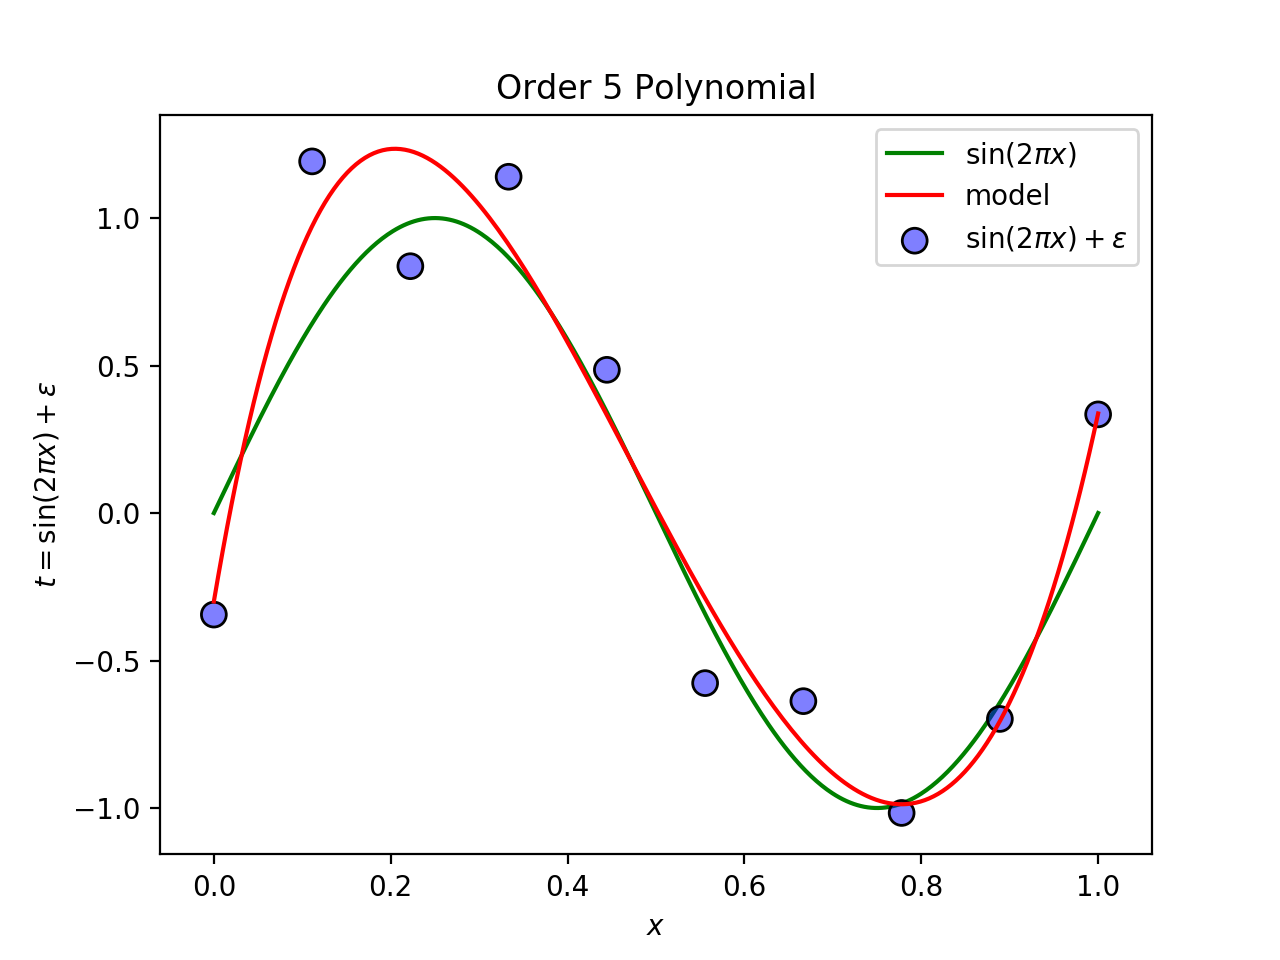

<IPython.core.display.Javascript object>


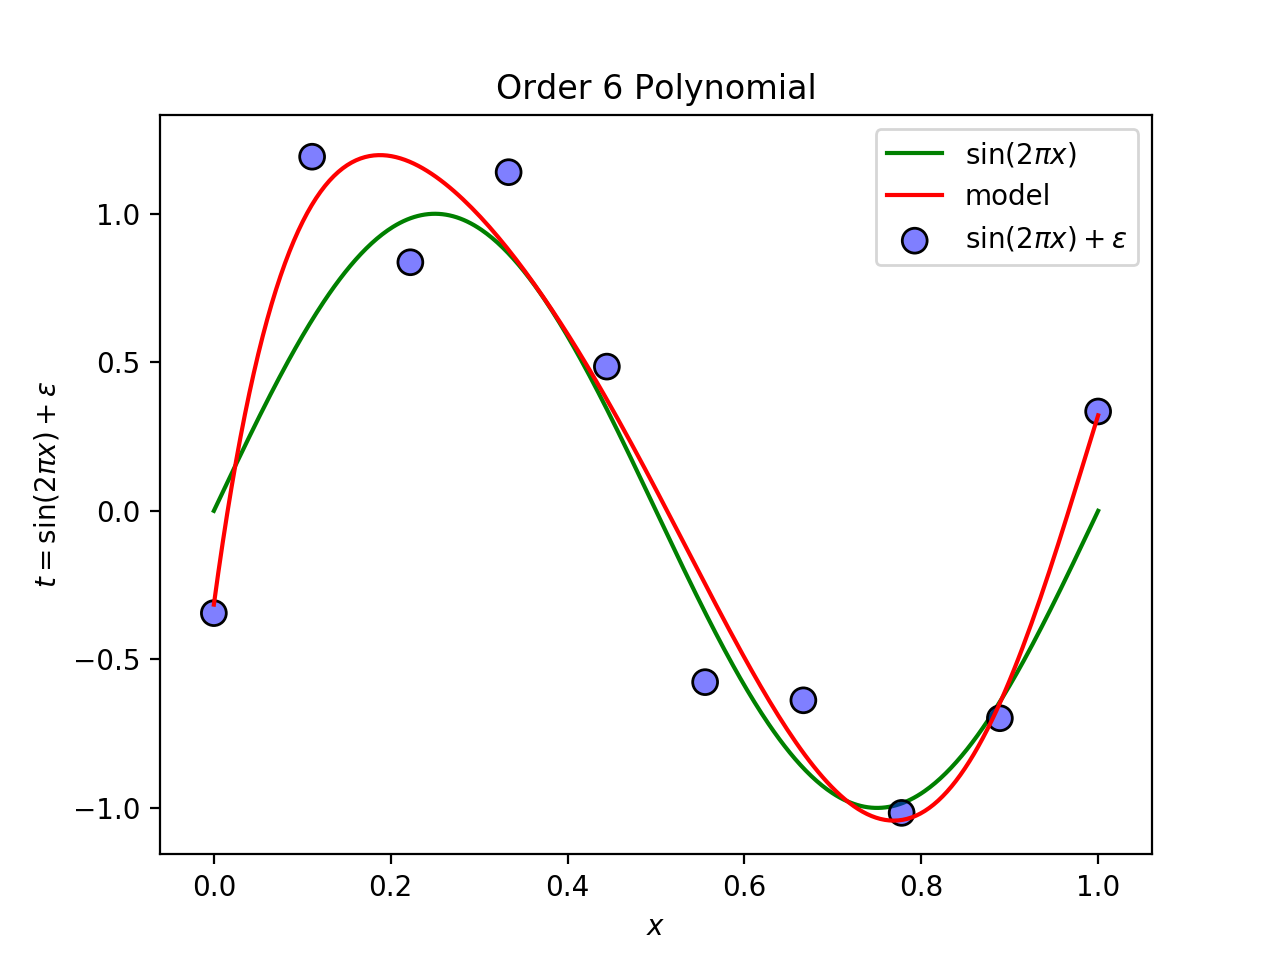

/Users/nathancrock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


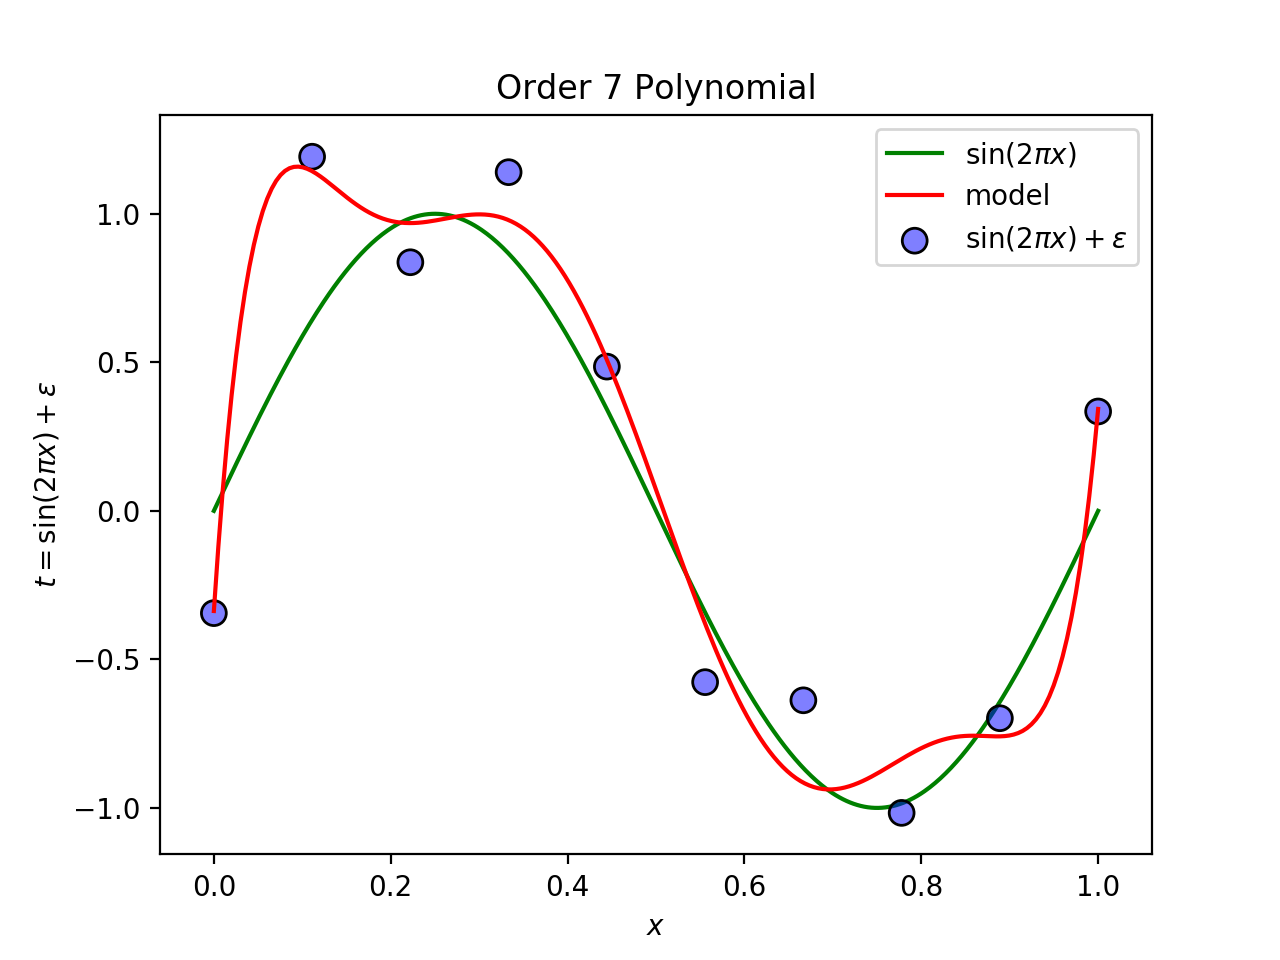

<IPython.core.display.Javascript object>


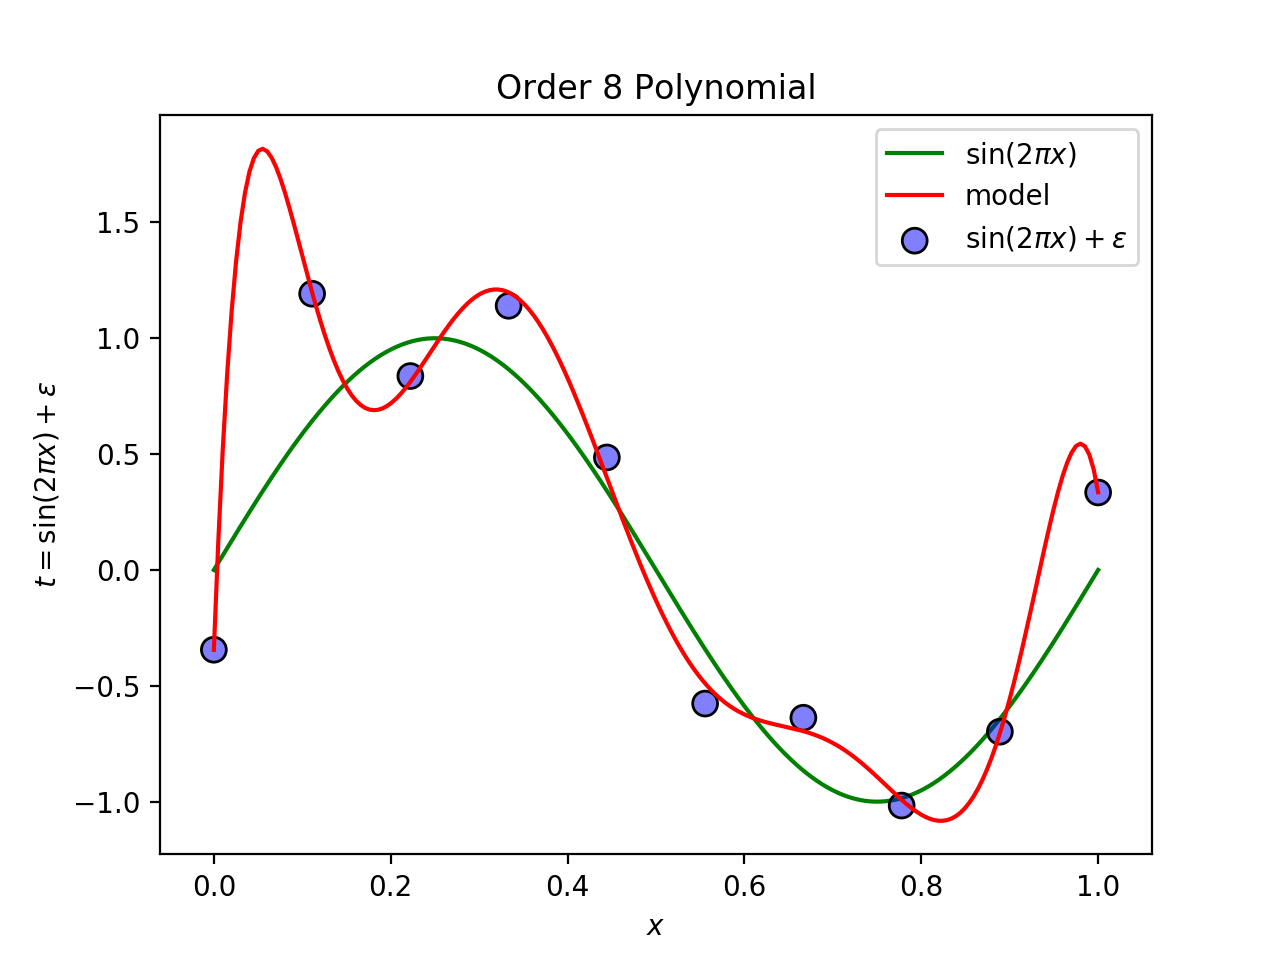

<IPython.core.display.Javascript object>


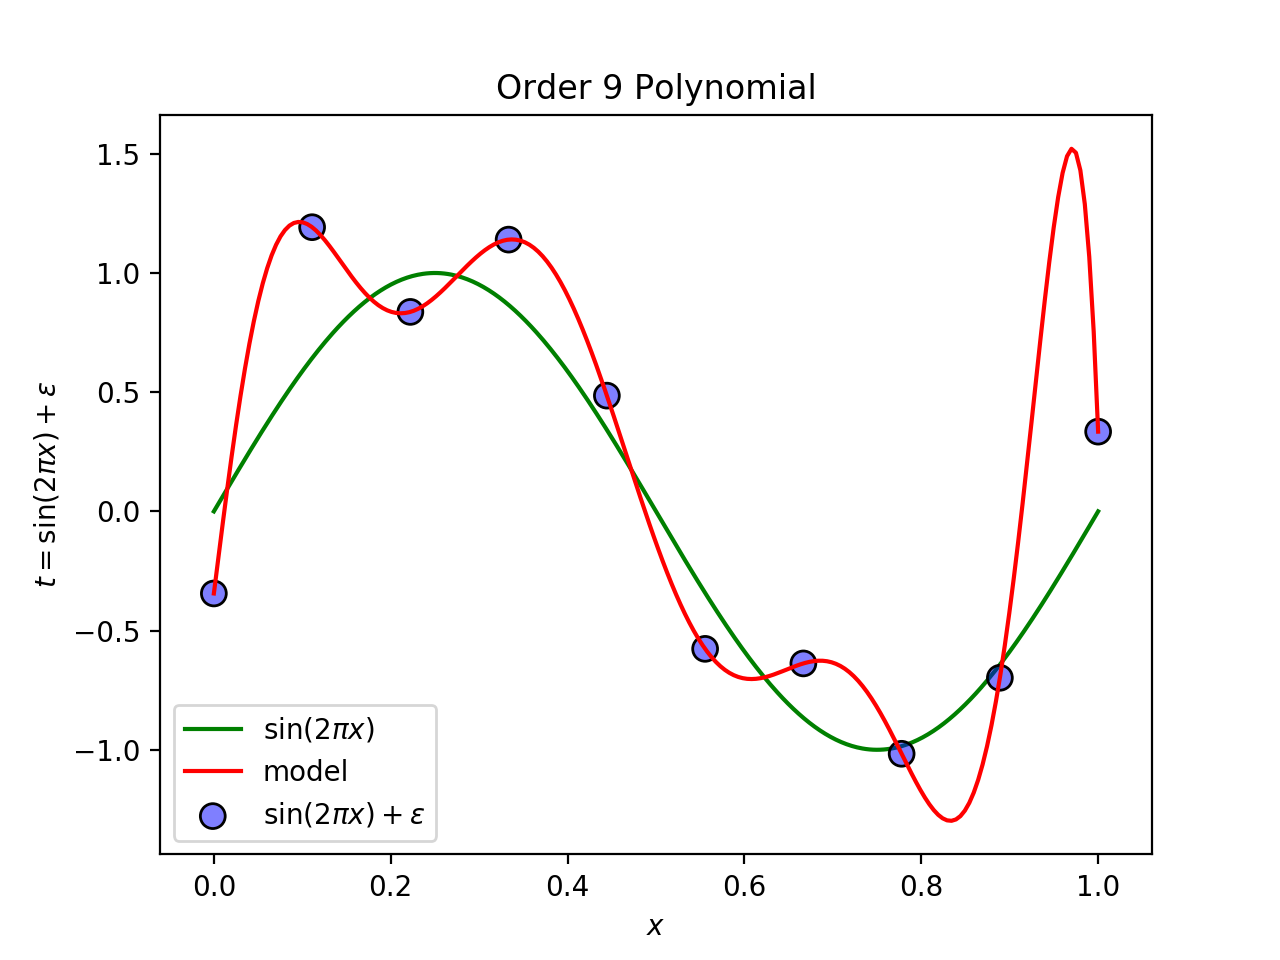

In [13]:
domain = np.linspace(0,1,200)
test_x, test_t = gen_data()
test_err = []
train_err = []
ws = []
for order in range(2,11):
    fig, ax = plt.subplots()
    X = np.vander(x,order,True)
    w = np.linalg.lstsq(X,t)[0]
    ws.append(w)
    train_err.append(J(w,x,t,order))
    test_err.append(J(w,test_x,test_t,order))
    pts = np.vander(domain,order,True)
    y = np.dot(pts,w)
    plot_dataset(ax,x,t)
    ax.plot(domain,y,c='r',label='model')
    ax.legend()
    ax.set_title('Order %d Polynomial' % (order-1))
    plt.show()

/Users/nathancrock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


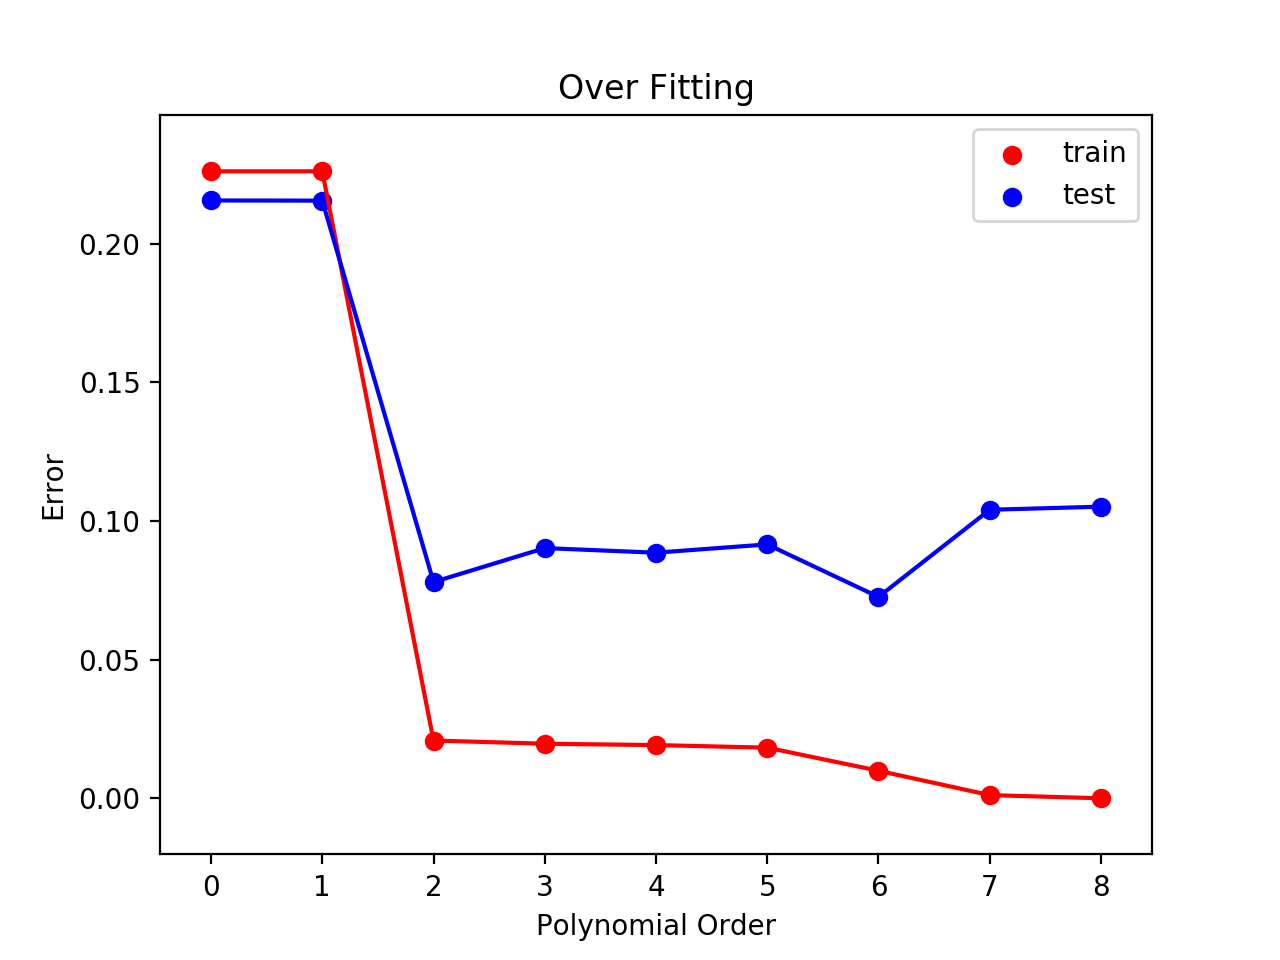

In [14]:
fig, ax = plt.subplots()
ax.scatter(range(len(train_err)),train_err,color='r',label='train'); 
ax.plot(train_err,color='r')
ax.scatter(range(len(test_err)),test_err,color='b',label='test'); 
ax.plot(test_err,color='b')
ax.legend()
ax.set(title='Over Fitting', xlabel='Polynomial Order', ylabel='Error')
ax.set_xticks(range(0,9),range(1,10))
plt.show()

## Regularization

If we examine the magnitude of the parameters as a function of polynomial order, we see that they quickly become unwieldly.



In [9]:
def J2(w,x,t,order,lamda):
    c = 1./(2*x.size)
    diff = t-model(x,w,order)
    cost = c*(diff**2).sum()
    return cost

In [10]:
ws

[array([ 0.86585537, -1.7186527 ]),
 array([ 0.78833602, -1.19539711, -0.52325559]),
 array([  0.11594487,   9.87504292, -29.70022879,  19.45131547]),
 array([-3.04598280e-02,  1.53652190e+01, -5.74256178e+01,  6.39217414e+01,
        -2.22352130e+01]),
 array([-4.06533160e-02,  1.62938457e+01, -6.51662978e+01,  8.58020635e+01,
        -4.73150161e+01,  1.00319213e+01]),
 array([-1.16881821e-02,  8.56449974e+00,  3.01927160e+01, -3.24632074e+02,
         7.45839056e+02, -6.95492483e+02,  2.35174801e+02]),
 array([-9.96095429e-03,  6.69663854e+00,  6.10138879e+01, -5.07405144e+02,
         1.26264106e+03, -1.44914044e+03,  7.82101952e+02, -1.56264900e+02]),
 array([-1.80734707e-02,  6.47552530e+01, -1.10982124e+03,  8.32371190e+03,
        -3.20522601e+04,  6.79092819e+04, -8.01360574e+04,  4.93854653e+04,
        -1.23854326e+04]),
 array([-1.71340996e-02, -3.33100877e+01,  1.15531730e+03, -1.20792238e+04,
         6.37980119e+04, -1.93222462e+05,  3.47451359e+05, -3.65347770e+05,
    

In [16]:
ws_abs = [np.abs(wsi).sum() for wsi in ws]
ws_abs

[1.9358325026925736,
 1.9343141676156246,
 80.58472222142443,
 115.5126906235781,
 251.9376742146556,
 1493.6668606183846,
 28743.374106101237,
 275557.652829072,
 818759.5694633124]

/Users/nathancrock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


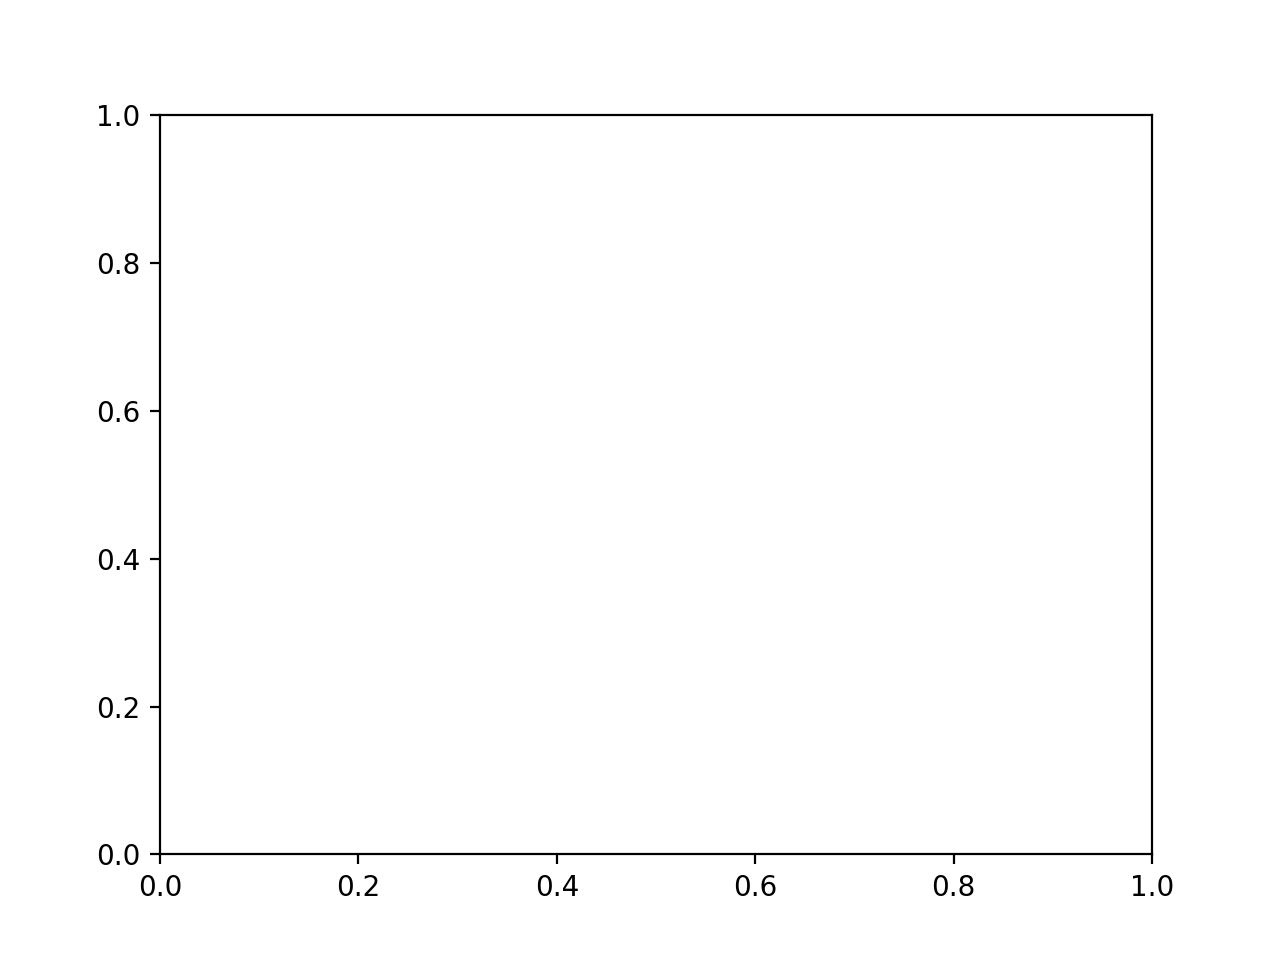

<IPython.core.display.Javascript object>


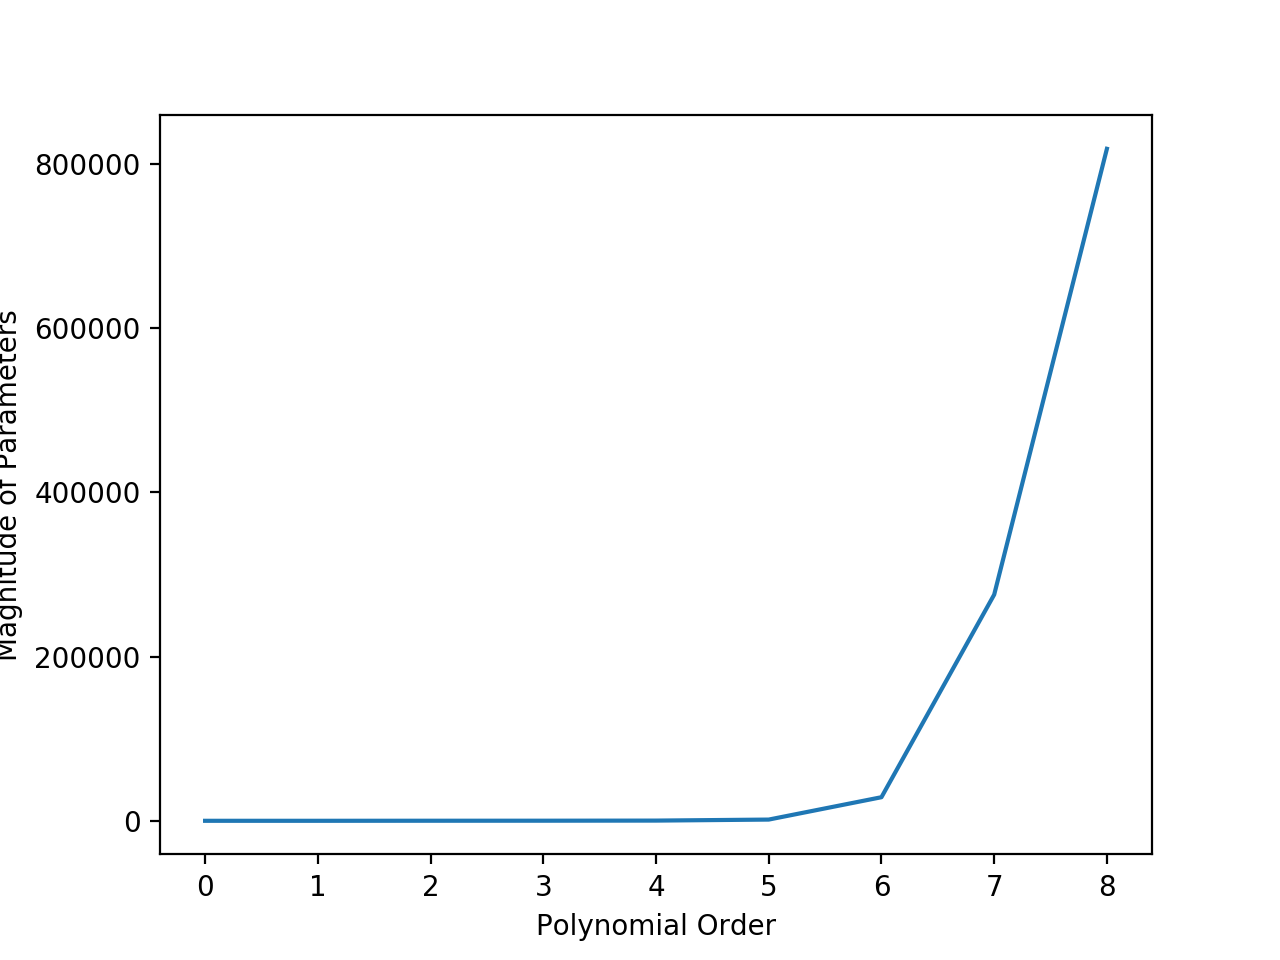

In [17]:
fig, ax = plt.subplots()
ax.plot(ws_abs)
plt.xlabel("Polynomial Order")
plt.ylabel("Magnitude of Parameters")
plt.show()

Therefore we add a term to the cost function that penalizes the parameters for getting too large. Methods that employ such scale controlling terms are often referred to as *shrinkage* methods. In statistics it is called *ridge regression* and in machine learning literature it is referred to as *weight decay*. 

$$ J(\mathbf{w}) = \frac{1}{2N}\sum_{j=0}^N (t_j-y(x_j,\mathbf{w}))^2 + \frac{\lambda}{2}\left\| \bf{w} \right\|^2$$


## Dataset Size and Overfitting

Now we examine how our training and test error changes as the number of observations increase.

/Users/nathancrock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/Users/nathancrock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


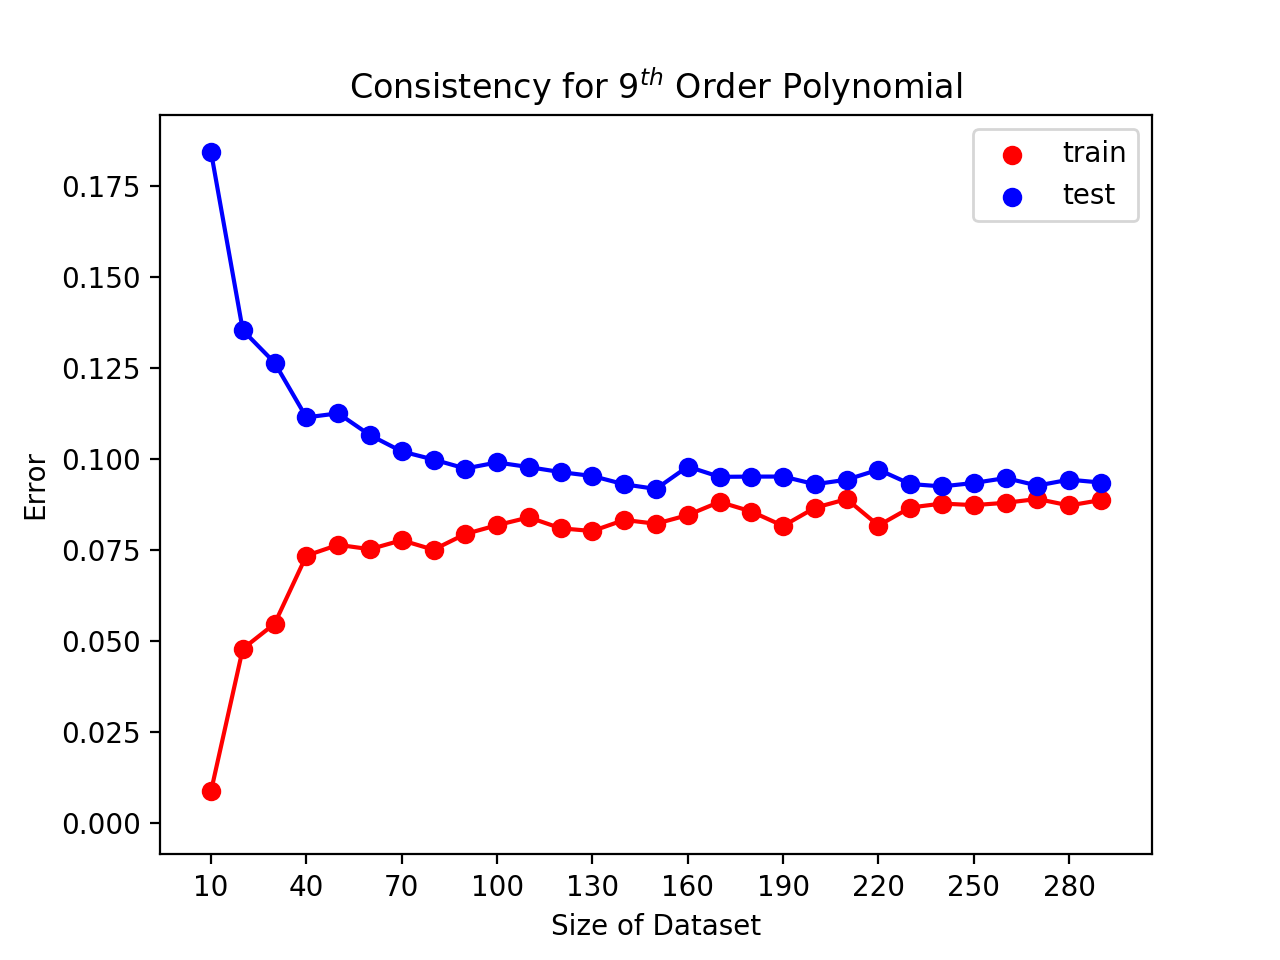

In [18]:
test_err = []
train_err = []
sizes = np.arange(10,300,10)
for size in sizes:
    trnerr = 0
    tsterr = 0
    for i in range(20):
        train_x, train_t = gen_data(size)
        X = np.vander(train_x, 9, True)
        w = np.linalg.lstsq(X, train_t)[0]
        trnerr += J(w, train_x, train_t, 9)
        test_x, test_t = gen_data(size)
        tsterr += J(w, test_x, test_t, 9)

    train_err.append(trnerr/10)
    test_err.append(tsterr/10)


    
fig, ax = plt.subplots()
ax.scatter(range(len(train_err)),train_err,color='r',label='train'); 
ax.plot(train_err,color='r')
ax.scatter(range(len(test_err)),test_err,color='b',label='test'); 
ax.plot(test_err,color='b')
ax.legend()
ax.set(title='Consistency for $9^{th}$ Order Polynomial', xlabel='Size of Dataset', ylabel='Error')
plt.xticks(range(0,sizes.size,3),sizes[::3])
plt.show()

/Users/nathancrock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


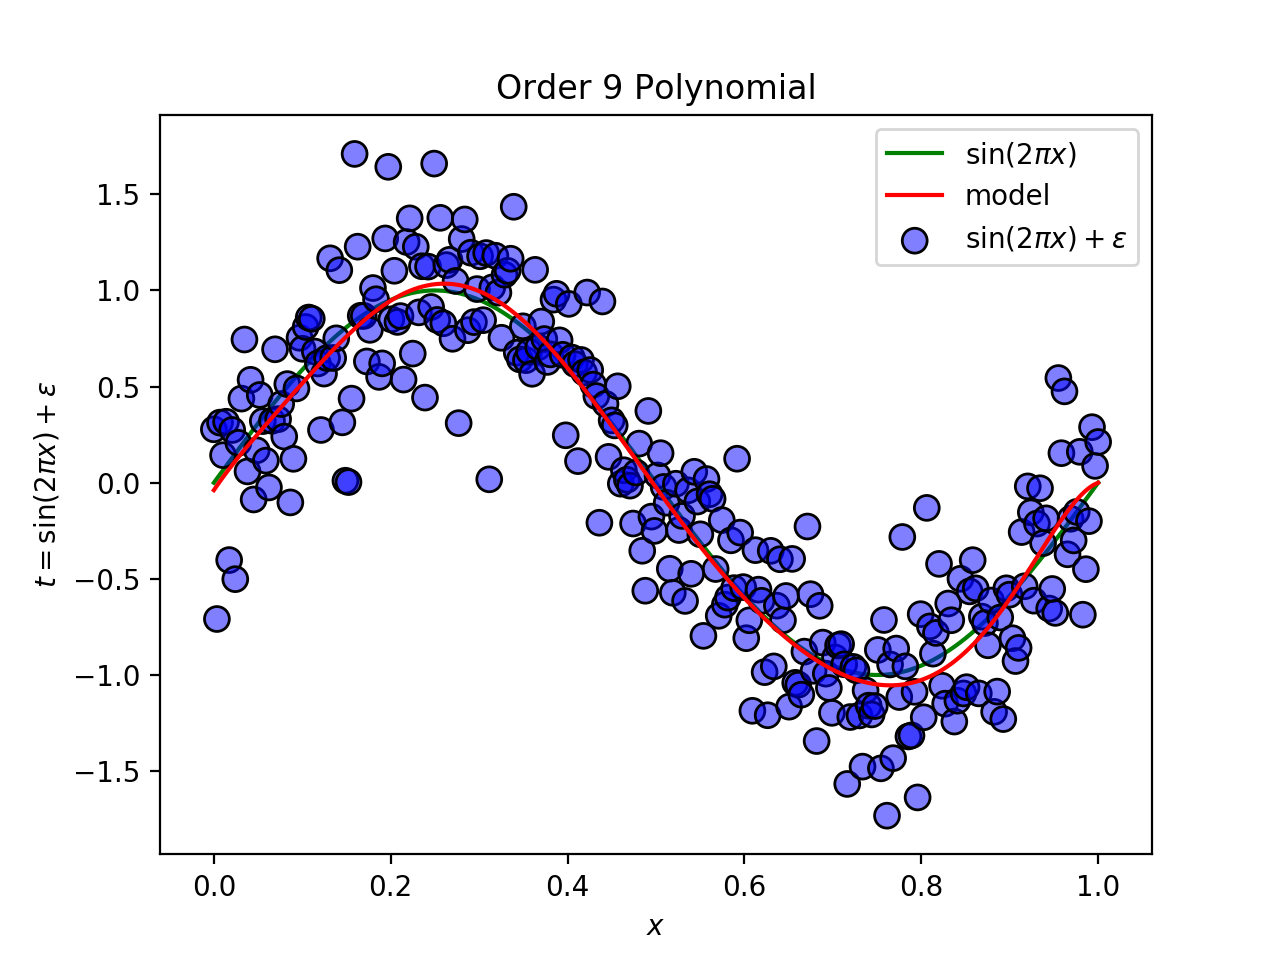

In [19]:
domain = np.linspace(0,1,200)
fig, ax = plt.subplots()
pts = np.vander(domain,9,True)
y = np.dot(pts,w)
plot_dataset(ax,train_x,train_t)
ax.plot(domain,y,c='r',label='model')
ax.legend()
ax.set_title('Order %d Polynomial' % (order-1))
plt.show()

## Probability and Bayesian Primer

Let our dataset be given by $\mathcal{D} = \lbrace \mathbf{x}, \mathbf{t} \rbrace$ and our model by $y(x,\mathbf{w})$. Our model is parameterized by $\mathbf{w}$ where $\dim{\mathbf{w}}=L$.

The **joint distribution** tells us everything about the data and is given by

$$p(w, \mathcal{D})$$

The **product rule** for probability theory allows us to express the joint distribution in terms of conditional and marginal distributions and is given by

$$p(w, \mathcal{D}) = p(w \lvert \mathcal{D})p(\mathcal{D}) = p(\mathcal{D} \lvert w)p(w)$$

The **sum rule** for probability theory allows us to eliminate certain variables and find what are called *marginal* distributions. It is given by

$$p(w) = \int p(w, \mathcal{D}) d\mathcal{D}$$
$$p(\mathcal{D}) = \int p(w,\mathcal{D}) dw$$
for continuous random variables, and
$$p(w) = \sum_{\mathcal{D}} p(w, \mathcal{D})$$
$$p(\mathcal{D}) = \sum_{w} p(w,\mathcal{D})$$
for discrete random variables.

Dividing by $p(\mathcal{D})$ in the product rule above we arrive at **Bayes Formula**.

$$p(w \lvert \mathcal{D}) = \frac{p(\mathcal{D}\lvert w)p(w)}{p(\mathcal{D})}$$

where

$$p(\mathcal{D}\lvert w) \hspace{5pt} \text{is called the Likelihood}$$

$$p(w) \hspace{5pt} \text{is called the Prior}$$

$$p(\mathcal{D}) \hspace{5pt} \text{is called the Marginal}$$

$$p(w \lvert \mathcal{D}) \hspace{5pt} \text{is called the Posterior}$$

Another common way of expressing Bayes Formula involves combining both the product and sum rules

$$p(w \lvert \mathcal{D}) = \frac{p(\mathcal{D}\lvert w)p(w)}{\sum_{w}p(\mathcal{D}\lvert w)p(w)}$$


## Probabilistic Perspective

Let us now cast the regression problem in a stochastic framework. Again our goal is to predict the target value $t$ given an input $x$ based on a set of traning data $\mathbf{x} = (x_1,\dots,x_n)^T$ and their corresponding target values $\mathbf{t} = (t_1,\dots,t_n)^T$. We know there is noise in the data, there always is, and until now we have not taken it into consideration. Now however we will directly consider the uncertainty in our predictions. We will assume that given an input $x$, our target value $t$ is given by a Gaussian distribution with a mean $y(x,\mathbf{w})$ and a standard deviation $\sigma$. As per our previous formulation the mean $y(x,\mathbf{w})$ is our prediction, however unlike our previous formulation here we explicitly consider our uncertainty via the standard deviation $\sigma$. 

$$p(t \lvert x,\mathbf{w},\sigma) = \mathcal{N}(t\lvert y(x,\mathbf{w}),\sigma)$$

Now if we assume that our training data $\lbrace \mathbf{x}, \mathbf{t} \rbrace$ are independent and identically distributed (iid), then we can express our likelihood function as

$$p(\mathbf{t} \lvert \mathbf{x},\mathbf{w},\sigma) = \prod_{n=1}^N \mathcal{N}(t_n\lvert y(x_n,\mathbf{w}),\sigma)$$

We notice a few things here. Firstly in casting this problem stochastically we have increased the number of parameters from $\dim{w}$ to $\dim{w}+1$ for the extra $\sigma$ term. By assuming $\sigma$ to be constant for all values of $x$ we're assuming the noise is what is called, homoscedastic. If instead we believed the noise were to change for different values of $x$, then we could allow the standard deviation to be a function of the input $\sigma(x)$, in which case we call the noise, heteroscedastic.

This new formulation changes our task **T**. Before we were fitting an $M^{th}$ order polynomial to the data, here however we wish to fit parameters $\theta = \lbrace{\mathbf{w}, \sigma}\rbrace$. Our goal this time will be to find the parameters $\theta^*$ that maximize the probability $p(\mathbf{t} \lvert \mathbf{x}, \mathbf{w}, \sigma)$. This goal, maximizing the likelihood, is the quintessential frequentist example. Where before we explicity chose the performance measure **P** to be the (SSE), here we will analytically optimize the likelihood and use the result as our performance measure.

![ml_vis](nlp_seminar/img/ml_vis.png)

The log function is monotonic, therefore, the extrema of $\ln f(x)$ equal the extrema of $f(x)$. Considering this and the fact that the logarithm of exponential distributions are analytically convenient, we will optimize the log of the likelihood.

$$ \ln p(\mathbf{t} \lvert \mathbf{x}, \mathbf{w}, \sigma) = -\frac{1}{2\sigma} \sum_{n=1}^N \lbrace y(x_n,\mathbf{w}) - t_n \rbrace^2 - \frac{N}{2} \ln \sigma- \frac{N}{2} \ln(2\pi)$$

Let us maximize the log likelihood with respect to $\mathbf{w}$. We notice two things, firstly that the second two terms are independent of $\mathbf{w}$, and secondly that maximizing the likelihood is equivalent to minimizing the negative log likelihood. 

$$ \mathbf{w}_{ML} = \max_\mathbf{w} \hspace{4pt} \ln p(\mathbf{t} \lvert \mathbf{x}, \mathbf{w}, \sigma) = \min_{\mathbf{w}} \frac{1}{2} \sum_{n=1}^N \lbrace y(x_n,\mathbf{w}) - t_n \rbrace^2 = \min \text{SSE}$$

Thus the SSE has arisen as a consequence of maximizing the likelihood under the assumption of Gaussian noise. The optimal parameters found with such a technique are aptly called the **maximum likelihood** solutions (ML). With the maximum likelihood solution for $\mathbf{w}$ found we can also find the maximum likelihood solution for the standard deviation.

$$\sigma_{ML} = \frac{1}{N} \sum_{n=1}^N \lbrace y(x_n, \mathbf{w}_{ML})-t_n \rbrace^2$$

With the optimal parameters found we can define our *predictive distribution*

$$p(t \lvert x, \mathbf{w}_{ML}, \sigma_{ML}) = \mathcal{N}(t \lvert y(x, \mathbf{w}_{ML}), \sigma_{ML})$$

## Let's Look Inside

What is the expected value of our SSE loss function $L(t,y(\bf{x}))$? We have dropped the dependence of $y$ on $\bf{w}$ for notational convenience and here $y$ operates element-wise on the vector $\bf{x}$.

$$ \mathbb{E}[L] = \iint L(t,y(\mathbf{x}))p(\mathbf{x},t)\text{d}\mathbf{x}\text{d}t $$

$$ \mathbb{E}[L] = \iint \lbrace y(\mathbf{x})-t \rbrace^2 p(\mathbf{x},t)\text{d}\mathbf{x}\text{d}t $$

We wish to choose a $y(\mathbf{x})$ that minimizes the expected loss. We use the calculus of variations

$$ \frac{\partial \mathbb{E}[L]}{\partial y(\mathbf{x})} = 2 \int \lbrace y(\mathbf{x})-t \rbrace p(\mathbf{x},t)\text{d}t $$

We now set it to zero and solve for $y(\mathbf{x})$

$$ y(\mathbf{x})\int p(\mathbf{x},t)\text{d}t - \int t p(\mathbf{x},t)\text{d}t = 0$$

$$ y(\mathbf{x}) = \frac{\int t p(\mathbf{x},t)\text{d}t}{p(\mathbf{x})} = \int t p(t \lvert \mathbf{x})\text{d}t = \mathbb{E}_t[t \lvert \mathbf{x}]$$

**Another way to view this result comes as follows**

$$ \lbrace y(\mathbf{x}) - t \rbrace^2 =  \lbrace y(\mathbf{x}) -\mathbb{E}_t[t \lvert \mathbf{x}] + \mathbb{E}_t[t \lvert \mathbf{x}]- t \rbrace^2$$

$$ \lbrace y(\mathbf{x}) - t \rbrace^2 =  \lbrace y(\mathbf{x}) -\mathbb{E}_t[t \lvert \mathbf{x}] \rbrace^2 + 2\lbrace y(\mathbf{x}) -\mathbb{E}_t[t \lvert \mathbf{x}] \rbrace\lbrace \mathbb{E}_t[t \lvert \mathbf{x}]- t \rbrace + \lbrace \mathbb{E}_t[t \lvert \mathbf{x}]- t \rbrace^2$$

We now substitute this expression into the loss function

$$ \mathbb{E}[L] = \iint \lbrace y(\mathbf{x}) -\mathbb{E}_t[t \lvert \mathbf{x}] \rbrace^2 p(\mathbf{x},t)\text{d}\mathbf{x}\text{d}t + 2\iint \lbrace y(\mathbf{x}) -\mathbb{E}_t[t \lvert \mathbf{x}] \rbrace\lbrace \mathbb{E}_t[t \lvert \mathbf{x}]- t \rbrace p(\mathbf{x},t)\text{d}\mathbf{x}\text{d}t + \iint \lbrace \mathbb{E}_t[t \lvert \mathbf{x}]- t \rbrace^2 p(\mathbf{x},t)\text{d}\mathbf{x}\text{d}t $$

Integrating over $t$ we notice that the cross term equals 0 and are left with

$$ \mathbb{E}[L] = \int \lbrace y(\mathbf{x}) -\mathbb{E}_t[t \lvert \mathbf{x}] \rbrace^2 p(\mathbf{x})\text{d}\mathbf{x} + \int \text{var} [t \lvert \mathbf{x}]p(\mathbf{x})\text{d}\mathbf{x}$$

Where the first term goes to zero exactly when $y(\mathbf{x}) = \mathbb{E}_t[t \lvert \mathbf{x}]$ and the second term represents the irreducible minimum loss due to noise.

## A Step Towards Bayes

### Frequentist
$$p(\bf{t} \lvert \bf{x},\bf{w},\sigma)$$

This is the likelihood function and is a key to understanding the frequentist perspective, or the perspective of frequencies of random repeatable events. It poses the problem as *"what is the probability of the data, given a certain set of parameters"*. In the previous example we found the set of parameters that maximized this distribution using a popular estimator called maximum likelihood. In other words, we estimated the parameters that maximize the probability of our data, which is maximizing the probability of the true data **ON AVERAGE**. This is the underlying distinction between Bayes and frequentist perspectives.

 In the frequentist perspective, the data is considered the random variable and it aims at finding solutions considering our uncertainty of the observed data. The parameters are considered fixed and their value is determined by some form of 'estimator'. Error bars or uncertainty in the parameters are found by considering the distribution of possible datasets $\mathcal{D}$. 

**In a frequentist perspective the data is the random variable**

### Bayesian
$$p(\bf{w} \lvert \bf{x},\bf{t},\sigma) \propto p(\bf{t} \lvert \bf{x},\bf{w},\sigma)p(\bf{w})$$


On the right we have the Bayesian viewpoint. From this perspective there is only one single data set $\mathcal{D}$, the one that is actually observed. The uncertainty in the parameters is expressed via the probability distribution describing them. 

**In a Bayesian perspective the parameters are the random variable.**

Let us examine the curve fitting problem from a more Bayesian perspective by introducing a prior over the parameters. For ease of exposition we will assume a simple Gaussian form

$$p(\bf{w} \lvert \alpha) = \mathcal{N}(\bf{w} \lvert \bf{0}, \alpha \bf{I}) = \bigg ( \frac{1}{2\pi \alpha} \bigg)^{(M+1)/2}\exp\bigg\{-\frac{1}{2\alpha}\bf{w}^T\bf{w}\bigg\}$$

Using Bayes theorem above we can express the posterior in terms of the likelihood and the prior. We interpret their product as a distribution describing the probability of $\bf{w}$ given the observed data $\mathcal{D} = \{\bf{x},\bf{t}\}$. If we find the $\bf{w}$ that maximize this posterior distribution we are finding the so-called **maximum posterior** solutions (MAP). Using techniques similar to ML we take the negative logarithm of the posterior and find that its maximum is given by the minimum of 

$$\bf{w}_{MAP} = \min_{\bf{w}} \frac{1}{2\sigma} \sum_{n=1}^N \lbrace y(x_n,\mathbf{w}) - t_n \rbrace^2 + \frac{1}{2\alpha}\bf{w}^T\bf{w}$$

We see that maximizing the posterior distribution is equivalent to minimizing the SSE with a shrinkage regularization term where $\lambda = \sigma/\alpha$.

## Full Bayes

Even though we've included a prior we're still making a point estimate of $\bf{w}$. A true fully Bayesian approach involves consistently applying the sum and product rules... To demonstrate let us go back to regression, but this time we are fitting a straight line with only a linear model $y(x,\bf{w}) = w_0 + w_1x$. We assume an isotropic Gaussian prior.

![full_bayes](nlp_seminar/img/full_bayes.png)

## Summary

### Frequentist
1. Data is the random variable
2. Maximizing the likelihood (ML) is estimating which parameters make the data most probable on average
3. Susceptible to bias and over fitting
4. Easily interpretable

### Bayesian
1. Parameters are the random variable
2. Maximizing the posterior (MAP) is finding which parameters are most probable given the data
3. Priors are often chosen for mathematical convenience rather than a reflection of prior beliefs, difficult to interpret
4. Protection against over fitting

### Full Bayes
1. Parameters and data are random variables
2. Alternate between considering the data and parameters as being observed and learn the full posterior distribution
3. Learns full distribution, everything about the data
4. With a well chosen prior, bias and over fitting is often of little concern
5. In practice it is computationally intractable. Must use approximation methods such as variational inference and Monte Carlo techniques